In [266]:
import pandas as pd
train_df=pd.read_csv('./happiness_train_complete.csv',index_col=0,encoding='gb2312')
test_df=pd.read_csv('./happiness_test_complete.csv',index_col=0,encoding='gb2312')
import  seaborn as sns#绘图库
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV 
#填充缺失值
from sklearn.preprocessing import Imputer
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [267]:
y=train_df.happiness
y[y<0]=0.0001
y.shape

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(8000,)

In [268]:
train_df.drop(['happiness'],axis=1,inplace=True)

In [269]:
all_data=pd.concat([train_df,test_df])#拼接两个数据集，便于统一操作

In [270]:
all_data.columns#查看有多少列，输出列名

Index(['survey_type', 'province', 'city', 'county', 'survey_time', 'gender',
       'birth', 'nationality', 'religion', 'religion_freq',
       ...
       'neighbor_familiarity', 'public_service_1', 'public_service_2',
       'public_service_3', 'public_service_4', 'public_service_5',
       'public_service_6', 'public_service_7', 'public_service_8',
       'public_service_9'],
      dtype='object', length=138)

In [271]:
import pandas as pd
import numpy as np
from collections import Counter
def detect_outliers(df,n, features):

    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)

        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers
#使用方法如下
# df = pd.read_csv("data.csv")
# Outliers_to_drop = detect_outliers(df, 2 ["Col1", "Col2", "Col3", "Col4"])
# df = df.drop(Outliers_to_drop, axis=0).reset_index(drop=True)



In [272]:
# Outliers_to_drop = detect_outliers(all_data, 0, num_columns)

In [273]:
# len(Outliers_to_drop)

In [274]:
cate_columns=[
             'province','city','county','gender','nationality','edu','edu_status'
             ,'political','health','hukou','hukou_loc','work_exper'
             ,'work_status','family_m','son','daughter'
              ,'minor_child','marital','s_edu','s_political','s_hukou','s_work_exper'
             ,'f_edu','f_work_14','m_edu','m_political','m_work_14'
            ]
del_columns=['survey_time','edu_other','edu_yr','join_party','property_other',
             'work_yr','work_type','work_manage','invest_other','s_work_type'
             ,'f_birth','m_birth','inc_exp','marital_1st','marital_now','s_work_status']
num_columns=[cat for cat in all_data if cat not in cate_columns and cat not in del_columns]


# 第一版删除的
# del_columns=['survey_time','edu_yr','join_party','work_yr','marital_1st','marital_now','edu_other','invest_other','property_other'
#             ,'s_work_type','s_work_status','work_status','work_manage','work_type']
# 手工筛选出特征
#第二版删除的特征
# del_columns=['survey_time','edu_other','edu_yr','join_party','property_other',
#              'work_yr','work_type','work_manage','invest_other','s_work_type'
#              ,'f_birth','m_birth','inc_exp','marital_1st','marital_now','s_work_status']

# num_columns = ['floor_area','birth','s_birth','height_cm','weight_jin',
#                'health_problem','family_income','family_m','house','son',
#                'daughter','minor_child','s_income','public_service_1','public_service_2',
#               'public_service_3','public_service_4','public_service_5','public_service_6',
#               'public_service_7','public_service_8','public_service_9']

# del_columns=['survey_time','edu_other','edu_yr','join_party','property_other',
#              'work_yr','work_type','work_manage','invest_other','s_work_type'
#              ,'f_birth','m_birth','inc_exp','marital_1st','marital_now','s_work_status']

# cate_columns = [cat for cat in all_data if cat not in num_columns and cat not in del_columns]
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10968 entries, 1 to 10968
Columns: 138 entries, survey_type to public_service_9
dtypes: float64(26), int64(108), object(4)
memory usage: 11.6+ MB


In [275]:
# print(all_data['edu'].value_counts())#值类别统计



In [276]:
for column in all_data.columns:
    print(all_data[column].value_counts())#值类别统计
    print('-----------------------------------------')

1    6470
2    4498
Name: survey_type, dtype: int64
-----------------------------------------
21    600
31    589
18    582
10    575
6     566
4     547
12    531
1     502
15    499
16    476
22    475
5     465
19    462
9     397
27    395
13    393
2     385
29    369
17    295
24    294
7     288
11    280
28    265
26    249
23    195
30    101
3      99
8      94
Name: province, dtype: int64
-----------------------------------------
7     547
1     502
32    336
64    302
87    296
18    288
57    270
81    265
27    197
36    196
65    194
52    191
46    187
8     185
66    184
82    180
41    108
22    108
39    102
16    102
85    101
4     100
23    100
34    100
55    100
80    100
79    100
49    100
61    100
37    100
     ... 
5      97
56     97
10     96
47     96
71     96
48     96
88     96
69     96
44     96
21     96
3      96
26     96
33     95
83     95
59     95
53     95
31     94
19     94
84     94
40     94
13     94
20     93
76     93
2      92
17   

Name: health, dtype: int64
-----------------------------------------
 4    4010
 5    3502
 3    1997
 2    1094
 1     313
-8      52
Name: health_problem, dtype: int64
-----------------------------------------
 4    4644
 5    2783
 3    2623
 2     763
 1     129
-8      26
Name: depression, dtype: int64
-----------------------------------------
1    6194
2    2877
5    1139
4     737
8       8
6       6
7       4
3       3
Name: hukou, dtype: int64
-----------------------------------------
1.0    8049
2.0    1801
3.0    1074
4.0      40
Name: hukou_loc, dtype: int64
-----------------------------------------
 1    5509
 2    2790
 3    1381
 4     902
 5     384
-8       2
Name: media_1, dtype: int64
-----------------------------------------
 1    6012
 2    2855
 3    1420
 4     579
 5      97
-8       5
Name: media_2, dtype: int64
-----------------------------------------
 1    6059
 2    2434
 3    1350
 4     819
 5     301
-8       5
Name: media_3, dtype: int64
---------------

In [277]:
all_data_dummies=all_data.drop(del_columns,axis=1)#删除感觉没用的列

In [278]:
all_data_dummies.shape

(10968, 122)

In [279]:
# 先用np.nan填充为空，然后在众数的空值填充策略
# neg_columns=['']
# for column in all_data_dummies.columns :
#     all_data_dummies.loc[all_data_dummies[column]<0,column]=np.nan
   

In [280]:
all_data_dummies.shape

(10968, 122)

In [281]:
all_data_dummies = pd.get_dummies(data=all_data_dummies,columns=cate_columns)#对部分特征进行one hot编码

In [282]:
all_data_dummies.shape

(10968, 564)

In [283]:
for column in all_data_dummies.columns:
    print(all_data_dummies[column].value_counts())#值类别统计
    print('-----------------------------------------')

1    6470
2    4498
Name: survey_type, dtype: int64
-----------------------------------------
1965    284
1968    273
1970    267
1963    262
1955    261
1957    243
1967    237
1964    236
1969    234
1953    229
1966    226
1954    226
1950    224
1952    224
1975    217
1962    210
1973    207
1956    206
1949    206
1972    204
1960    190
1971    189
1958    188
1951    185
1974    183
1948    182
1990    174
1945    174
1947    169
1978    169
       ... 
1984    118
1991    118
1942    114
1940    112
1943    112
1994    110
1995    104
1941    101
1997     98
1937     88
1996     88
1935     84
1939     84
1938     80
1936     78
1933     76
1934     64
1930     48
1931     41
1932     39
1929     30
1928     24
1927     16
1925     15
1926     11
1922      8
1923      4
1924      4
1921      3
1920      1
Name: birth, Length: 78, dtype: int64
-----------------------------------------
 1    9639
 0    1183
-8     146
Name: religion, dtype: int64
--------------------------------

-----------------------------------------
 4    4318
 3    3690
 2    1730
 5     833
 1     375
-8      22
Name: relax, dtype: int64
-----------------------------------------
 1    4947
 2    3039
 3    1764
 4     933
 5     257
-8      28
Name: learn, dtype: int64
-----------------------------------------
 2.0    2152
 1.0    1938
 3.0    1698
 5.0    1157
 7.0    1119
 6.0    1051
 4.0     739
-8.0      17
Name: social_neighbor, dtype: int64
-----------------------------------------
 3.0    2282
 2.0    2030
 5.0    1655
 6.0    1112
 1.0    1007
 4.0     949
 7.0     776
-8.0      60
Name: social_friend, dtype: int64
-----------------------------------------
 1    6212
 2    2450
 3     962
 6     565
 4     482
 5     226
-8      71
Name: socia_outing, dtype: int64
-----------------------------------------
 4    5067
 3    2433
 2    2419
 1     617
 5     368
-8      64
Name: equity, dtype: int64
-----------------------------------------
 5     3800
 4     2047
 3     1472
 6   

-----------------------------------------
 80.0     2657
 70.0     1924
 60.0     1882
 50.0     1109
 90.0      918
 100.0     528
 40.0      283
 85.0      231
 75.0      229
-2.0       204
 30.0      178
 65.0      101
 20.0       93
 95.0       79
 0.0        73
 78.0       44
 10.0       37
-3.0        29
 79.0       25
 98.0       23
 84.0       22
 55.0       20
 87.0       19
 88.0       18
 5.0        17
 89.0       17
 99.0       16
 76.0       15
 45.0       14
 7.0        13
          ... 
 68.0        4
 69.0        4
 62.0        4
 35.0        4
 81.0        3
 9.0         3
 83.0        3
 94.0        3
 74.0        3
 72.0        3
 11.0        2
 66.0        2
 64.0        2
 12.0        2
 1.0         2
 58.0        2
 71.0        1
 42.0        1
 57.0        1
 39.0        1
 91.0        1
 0.5         1
 49.0        1
 93.0        1
 61.0        1
 18.0        1
 73.0        1
 29.0        1
 46.0        1
 63.0        1
Name: public_service_2, Length: 71, dtype: 

Name: city_46, dtype: int64
-----------------------------------------
0    10872
1       96
Name: city_47, dtype: int64
-----------------------------------------
0    10872
1       96
Name: city_48, dtype: int64
-----------------------------------------
0    10868
1      100
Name: city_49, dtype: int64
-----------------------------------------
0    10869
1       99
Name: city_50, dtype: int64
-----------------------------------------
0    10869
1       99
Name: city_51, dtype: int64
-----------------------------------------
0    10777
1      191
Name: city_52, dtype: int64
-----------------------------------------
0    10873
1       95
Name: city_53, dtype: int64
-----------------------------------------
0    10871
1       97
Name: city_54, dtype: int64
-----------------------------------------
0    10868
1      100
Name: city_55, dtype: int64
-----------------------------------------
0    10871
1       97
Name: city_56, dtype: int64
-----------------------------------------
0    10698

In [284]:
#归一化
s = (all_data_dummies[num_columns] - all_data_dummies[num_columns].min())/(all_data_dummies[num_columns].max() - all_data_dummies[num_columns].min())
all_data_dummies[s.columns] = s


In [285]:
all_data_dummies.shape

(10968, 564)

In [286]:
na_count = all_data.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(all_data)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(30)#统计缺失值的代码段，感觉写的很好，可以直接用

,count,ratio
edu_other,10962,0.999453
invest_other,10923,0.995897
property_other,10879,0.991885
join_party,9842,0.897338
s_work_type,7444,0.678702
s_work_status,7444,0.678702
work_status,6939,0.632659
work_yr,6939,0.632659
work_manage,6938,0.632567
work_type,6938,0.632567


In [287]:

im = Imputer(strategy="most_frequent",axis=1)#众数填充
filled_nan_data = im.fit_transform(all_data_dummies)
filled_nan_data=pd.DataFrame(filled_nan_data,index=range(1,len(all_data)+1))
filled_nan_data.columns=all_data_dummies.columns

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [288]:
filled_nan_data#查看填充好的数据
filled_nan_data.shape,y.shape

((10968, 564), (8000,))

In [296]:
X =filled_nan_data.loc[train_df.index]#重新分开数据，
X_test=filled_nan_data.loc[test_df.index]#X_val 就是要预测的x
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.9,random_state=10)

X_train.shape

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(7200, 564)

In [290]:

#特征选取
# 特征选择
# select_attr = []
# # corrcoef 系数:相关系数矩阵
# for column in all_data_dummies.columns:
#     cur_cor = np.corrcoef(X[column],y)[0][1]
#     if cur_cor > 0.075:
#         select_attr = np.append(select_attr,column)
# # 2、互信息做特征选择:经典的互信息也是评价定性自变量对定性因变量的相关性的
# from sklearn.feature_selection import SelectKBest
# from minepy import MINE

# mine = MINE()
# mic_scores = []
# for i in range(X.shape[1]):
#     mine.compute_score(X.iloc[:,i], y)
#     m = mine.mic()
#     if m > 0.015:
#         select_attr = np.append(select_attr,all_data_dummies.columns[i])

# from sklearn.feature_selection import VarianceThreshold
# sel=VarianceThreshold(threshold=(0.8*(1-0.8)))#表示剔除特征的方差大于阈值的特征Removing features with low variance
# selected_x=sel.fit_transform(X)#返回的结果为选择的特征矩阵
 
# # print(selected_x.columns)
# X_train,X_val,y_train,y_val = train_test_split(selected_x,y,train_size=0.9,random_state=10)
# model = XGBRegressor()
# cv_params={}
# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
# optimized_GBM.fit(X=X_train,y= (y_train))
# print(optimized_GBM.best_estimator_)
# print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
# print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))
# y_pred=optimized_GBM.best_estimator_.predict(X_val)
# print('泛化性能均方误差:',np.mean((y_val-(y_pred))**2))
# 最佳模型得分:-0.4885949877876721
# 泛化性能均方误差: 0.507567765020302

In [291]:
#没用到
#首先自定义得分函数
def my_loss(y_true,y_pred):
    return np.abs(np.mean((y_true-y_pred)**2))

score = make_scorer(my_loss, greater_is_better=False)
#首先自定义得分函数
def my_metric(y_pred,y_true):
    label=y_true.get_label()
#     print(y_pred.shape)#预测出来的是概率值，每行六个概率，
    arr=np.argmax(y_pred,axis=1)
#     print(arr)
#     print(label)
    return 'my_metric',np.abs(np.mean((label-arr)**2))
score = make_scorer(my_loss, greater_is_better=False)#score传给GridSearchCV（scoring）

In [308]:
#调参xgboost
cv_params = {
#             'n_estimators': [80,90,100,110,120],
#             'learning_rate': [0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03],
#             'subsample':[ 0.1 * i for i in range(6,9)],
#             'colsample_bytree':[ 0.1 * i for i in range(6,9)],
#             'gamma':[ 0.1 * i for i in range(0,5)],
#             'max_depth': list(range(4,9)), 
#             'min_child_weight': list((1,3,6))
}
# cv_params = {'n_estimators': [100,150]}
other_params = { 'max_depth': 3, 'min_child_weight': 1, 'seed': 0,'random_state':42,'learning_rate':0.105,
                'subsample':0.89, 'colsample_bytree': 0.7, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1,'n_jobs':-1}

model = XGBRegressor(**other_params)
# model = XGBRegressor()
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
optimized_GBM.fit(X=X,y= (y))
# print(optimized_GBM.best_estimator_)
# print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
# print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))
# y_pred=optimized_GBM.best_estimator_.predict(X_val)
# print('泛化性能均方误差:',np.mean((y_val-(y_pred))**2))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... , score=-0.47906488456213514, total=  21.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s


[CV] ...................... , score=-0.5053109071888167, total=  21.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.9s remaining:    0.0s


[CV] ...................... , score=-0.4765050209479213, total=  21.9s
[CV]  ................................................................
[CV] ...................... , score=-0.4607603743305593, total=  22.1s
[CV]  ................................................................
[CV] ..................... , score=-0.47629675759733686, total=  22.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.105,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.89),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [229]:
optimized_GBM.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)>

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


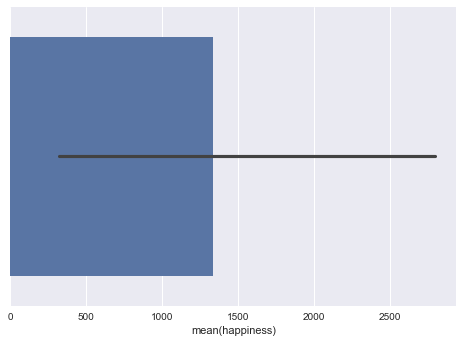

In [304]:
#异常值检测
# all_data['floor_area']
sns.barplot(y.value_counts())
plt.show()

In [186]:
# lr=[0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.10,0.105,0.110]
n_estimators=[10,80,90,100,150,200,250,500]#  0.5059
subsamples=[0.6,0.63,0.65,0.67,0.68,0.69,0.83,0.86,0.87,0.88,0.89,0.9]# 0.5084413
min_child_weight=[0.5,0.6,0.7,0.8,0.9]
val_score=[]
train_score=[]
for x in n_estimators:
    model = XGBRegressor(max_depth=3,learning_rate=0.105,n_estimators=x,subsample=0.89)
    model.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric='rmse',early_stopping_rounds=10,verbose=3)
    pred=model.predict(X_val)
    score=np.mean((y_val-(pred))**2)
    val_score.append(score)
    pred_train=model.predict(X_train)
    score=np.mean((y_train-(pred_train))**2)
    train_score.append(score)


[0]	validation_0-rmse:3.08814
Will train until validation_0-rmse hasn't improved in 10 rounds.
[3]	validation_0-rmse:2.26798
[6]	validation_0-rmse:1.69781
[9]	validation_0-rmse:1.31945
[0]	validation_0-rmse:3.08814
Will train until validation_0-rmse hasn't improved in 10 rounds.
[3]	validation_0-rmse:2.26798
[6]	validation_0-rmse:1.69781
[9]	validation_0-rmse:1.31945
[12]	validation_0-rmse:1.07066
[15]	validation_0-rmse:0.917839
[18]	validation_0-rmse:0.828
[21]	validation_0-rmse:0.777846
[24]	validation_0-rmse:0.750026
[27]	validation_0-rmse:0.735082
[30]	validation_0-rmse:0.726521
[33]	validation_0-rmse:0.722856
[36]	validation_0-rmse:0.720422
[39]	validation_0-rmse:0.719668
[42]	validation_0-rmse:0.716938
[45]	validation_0-rmse:0.716448
[48]	validation_0-rmse:0.717093
[51]	validation_0-rmse:0.716098
[54]	validation_0-rmse:0.71495
[57]	validation_0-rmse:0.714361
[60]	validation_0-rmse:0.714421
[63]	validation_0-rmse:0.713864
[66]	validation_0-rmse:0.713529
[69]	validation_0-rmse:0.71

[1.7841572815518743, 0.43130840926016023, 0.43130840926016023, 0.43130840926016023, 0.43130840926016023, 0.43130840926016023, 0.43130840926016023, 0.43130840926016023]


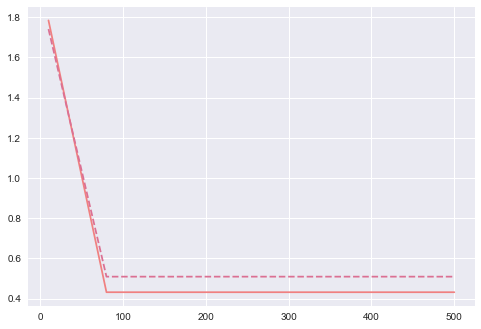

In [188]:
print(train_score)
import matplotlib.pyplot as plt
plt.plot(n_estimators,train_score,label="train_score",color="#F08080")
plt.plot(n_estimators,val_score,label="val_score",color="#DB7093",linestyle="--")
plt.show()

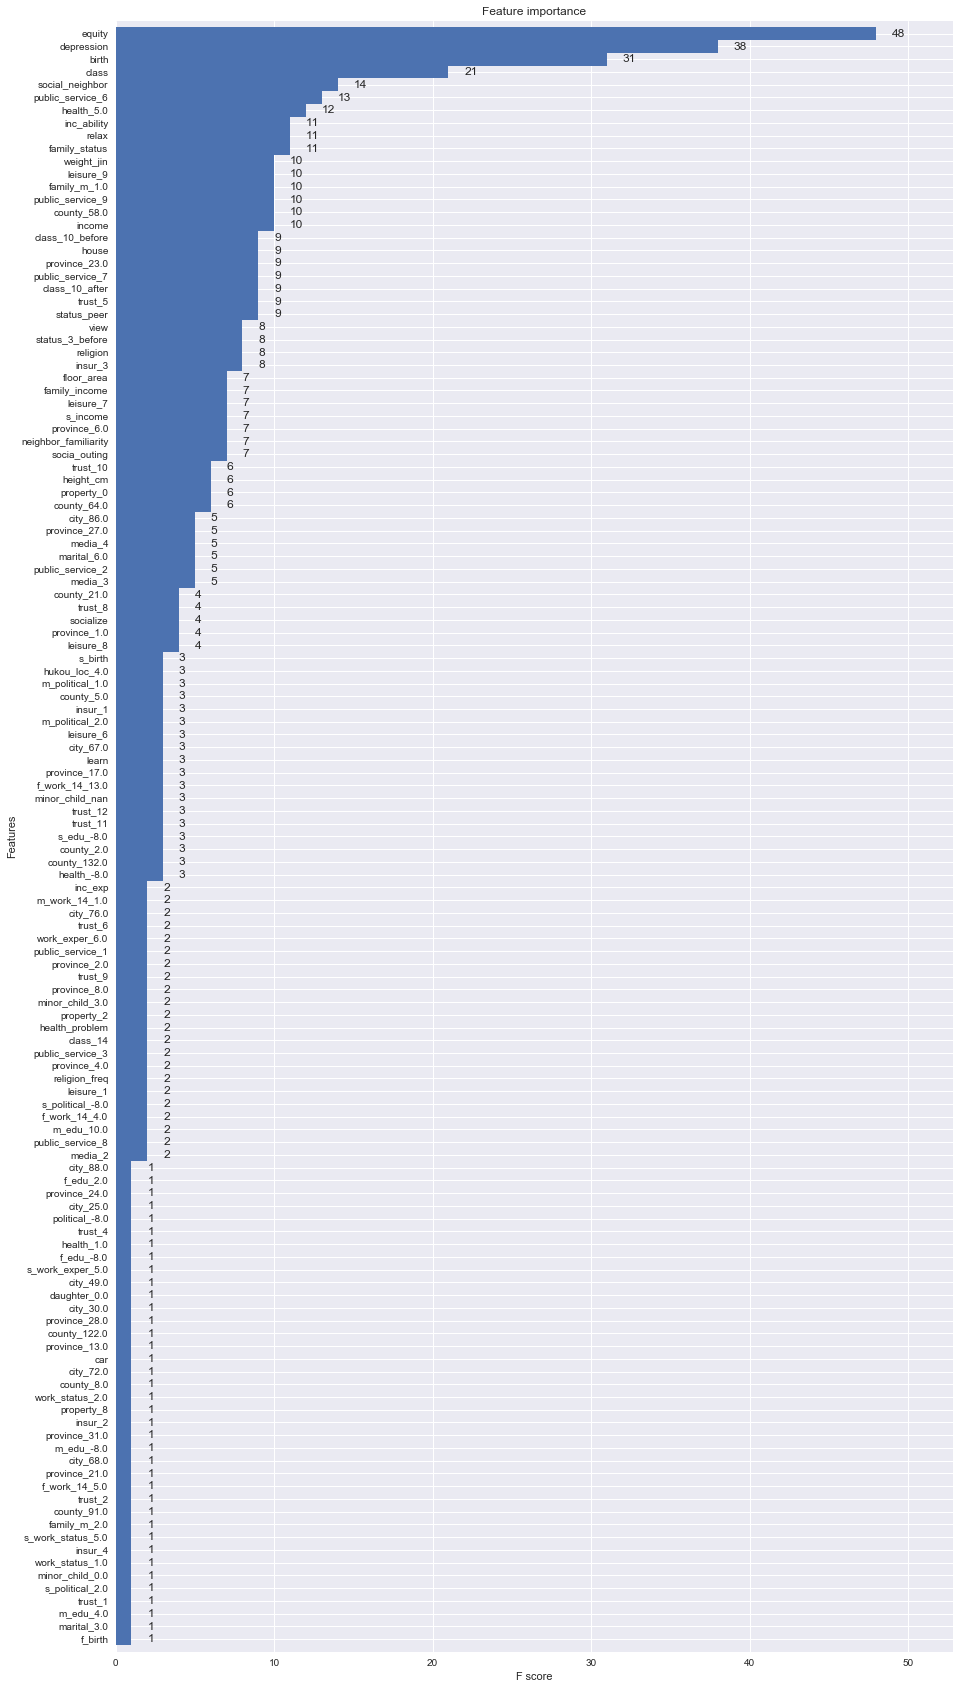

In [53]:
#绘制特征重要性的库
from xgboost import plot_importance
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(15,30))
plot_importance(model,
                height=1,
                ax=ax,
                max_num_features=300)
plt.show()

In [309]:
y_pred=optimized_GBM.best_estimator_.predict(X_test)
y_pred

array([3.8415525, 2.8691754, 3.1678813, ..., 4.0699196, 3.928096 ,
       5.1047235], dtype=float32)

In [310]:
submit_data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\happiness\\happiness_submit.csv',encoding='gb2312')
submit_data['happiness'] =y_pred
submit_data.to_csv('C:\\Users\\lenovo\\Desktop\\happiness\\happiness_submit.csv', index=False)#写入目录

In [96]:
from sklearn import linear_model


In [227]:
from sklearn import linear_model
reg = linear_model.BayesianRidge(n_iter=10)
reg.fit(X_train, y_train)
pre=reg.predict(X_val)
print('泛化误差',np.mean((y_val-pre)**2))
print('训练误差',np.mean((y_train-reg.predict(X_train))**2))
#贝叶斯网络

泛化误差 0.5560155107388995
训练误差 0.4741551358220415


In [424]:
#Ridge回归调参
from sklearn.linear_model import Ridge
alpha=[0.00001,0.002,0.003,0.004,0.005,0.006,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# alpha=np.arange(0,0.5,0.1)
val_score=[]
for x in alpha:
    model =Ridge(alpha=x)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    score=np.mean((y_val-(pred))**2)
    val_score.append(score)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.0011e-21): result may not be accurate.
  overwrite_a=True).T
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.60194e-18): result may not be accurate.
  overwrite_a=True).T
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.40408e-18): result may not be accurate.
  overwrite_a=True).T
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.20689e-18): result may not be accurate.
  overwrite_a=True).T
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.01032e-18): result may not be accurate.
  overwrite_a=True).T
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ri

[0.5667684605868082, 0.5668001489654602, 0.5668154889124232, 0.5668304029791306, 0.566844879749865, 0.5668589159953363, 0.5673519229662252, 0.5674987672623882, 0.5675772126906018, 0.5676251313899544, 0.567654961304121, 0.5676727621659909, 0.5676820555949281, 0.5676850887477589, 0.5676833804752084]


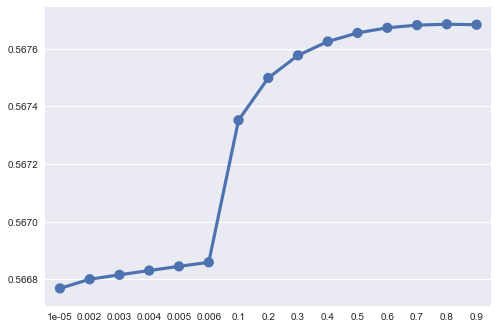

In [425]:
print(val_score)
sns.pointplot(x=alpha,y=val_score)
plt.show()
#太高不可用

In [431]:
#SMR来一个
from sklearn import svm
val_score=[]
# n_estimators=[10,80,90,100,150,200,250,500]#  
# subsamples=[0.6,0.63,0.65,0.67,0.68,0.69,0.83,0.86,0.87,0.88,0.89,0.9]# 
# min_child_weight=[0.5,0.6,0.7,0.8,0.9]
max_features=[0.2,0.3,0.4,0.5,0.6]
for x in max_features:
    model =RandomForestRegressor(n_estimators=200,verbose=True,max_features=x)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    score=np.mean((y_val-(pred))**2)
    val_score.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[0.5154346279103291, 0.5162459138065784, 0.511777772636731, 0.5104576313754423, 0.5191402786437851]


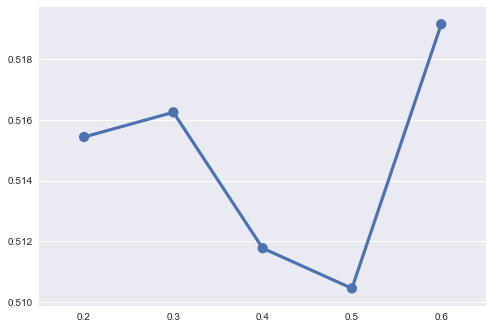

In [432]:
print(val_score)
sns.pointplot(max_features,y=val_score)
plt.show()

In [256]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.1,
                        n_estimators=40)
gbm.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='l2',
        early_stopping_rounds=5)
 
print('Start predicting...')
# predict
y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration_)
# eval
print('The rmse of prediction is:', mean_squared_error(y_val, y_pred))
 
# feature importances
print('Feature importances:', list(gbm.feature_importances_))
 
# # # other scikit-learn modules
# estimator = lgb.LGBMRegressor(num_leaves=31)
 
# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [20, 40]
# }
 
# gbm = GridSearchCV(estimator, param_grid)
# gbm.fit(X_train, y_train) 
# print('Best parameters found by grid search are:', gbm.best_params_)

[1]	valid_0's l2: 0.700974	valid_0's l2: 0.700974
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.672991	valid_0's l2: 0.672991
[3]	valid_0's l2: 0.650697	valid_0's l2: 0.650697
[4]	valid_0's l2: 0.631409	valid_0's l2: 0.631409
[5]	valid_0's l2: 0.617867	valid_0's l2: 0.617867
[6]	valid_0's l2: 0.603988	valid_0's l2: 0.603988
[7]	valid_0's l2: 0.591414	valid_0's l2: 0.591414
[8]	valid_0's l2: 0.580223	valid_0's l2: 0.580223
[9]	valid_0's l2: 0.57274	valid_0's l2: 0.57274
[10]	valid_0's l2: 0.566511	valid_0's l2: 0.566511
[11]	valid_0's l2: 0.558818	valid_0's l2: 0.558818
[12]	valid_0's l2: 0.555003	valid_0's l2: 0.555003
[13]	valid_0's l2: 0.550023	valid_0's l2: 0.550023
[14]	valid_0's l2: 0.544759	valid_0's l2: 0.544759
[15]	valid_0's l2: 0.542766	valid_0's l2: 0.542766
[16]	valid_0's l2: 0.539406	valid_0's l2: 0.539406
[17]	valid_0's l2: 0.536478	valid_0's l2: 0.536478
[18]	valid_0's l2: 0.534479	valid_0's l2: 0.534479
[19]	valid_0's l2: 0.533645	vali

In [263]:
#模型的融合
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import  SVC
#Stacking

clfs = [
#         RandomForestRegressor(n_estimators=200,max_features=.5,verbose=True),
#         XGBRegressor(max_depth=3,learning_rate=0.105,n_estimators=100,subsample=0.89,silent=False),
        lgb.LGBMRegressor(objective='regression',num_leaves=31,learning_rate=0.1,n_estimators=40) 
#           ，Ridge()
]
#训练过程
dataset_stack_train = np.zeros((X_train.shape[0],len(clfs)))
dataset_stack_test = np.zeros((X_val.shape[0],len(clfs)))
for j,clf in enumerate(clfs):
    clf.fit(X_train,y_train)
    y_submission = clf.predict(X_val)
    y_train_tmp = clf.predict(X_train)
    dataset_stack_train[:,j] = y_train_tmp
    dataset_stack_test[:,j] = y_submission


In [264]:
print("开始Stacking....")

clf = Ridge()
# clf=XGBRegressor(max_depth=3,learning_rate=0.105,n_estimators=100,subsample=0.89,silent=False)
clf.fit(dataset_stack_train,y_train)
y_submission = clf.predict(dataset_stack_test)
print(np.mean((y_val-y_submission)**2))
#     result = pd.DataFrame({"Id": submit_df.index, "SalePrice": predictions})
#     result.to_csv('stack_result.csv', index=False)
# val_score=[]
# # n_estimators=[10,80,90,100,150,200,250,500]#  
# subsamples=[0.6,0.63,0.65,0.67,0.68,0.69,0.83,0.86,0.87,0.88,0.89,0.9]# 
# min_child_weight=[0.5,0.6,0.7,0.8,0.9]
# max_features=[0.1,0.2,0.3,0.4,0.5,0.6]
# # for x in min_child_weight:
# model =RandomForestRegressor(n_estimators=100,verbose=True,max_features=0.2)
# model.fit(X_train,y_train)
# pred=model.predict(X_val)
# score=np.mean((y_val-(pred))**2)
# # val_score.append(score)
# 开始Stacking....四个
# 0.533204211670217

开始Stacking....
0.5186361355539563


In [442]:
score
# print(val_score)
# sns.pointplot(n_estimators,y=val_score)
# plt.show()

0.5177104489066292